In [1]:
import os, sys
from PIL import Image
# from osgeo import gdal, ogr, osr
# gdal.UseExceptions()
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from rasterio.warp import reproject, Resampling, calculate_default_transform
import numpy as np
from rasterio.enums import Resampling
from skimage.morphology import erosion, dilation, diamond, square, opening, disk
from scipy import ndimage
from datetime import datetime
from skimage.filters import threshold_local

import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import shutil

import powerlaw

In [3]:
# location where the floe library is
direc='/Users/ellenbuckley/Documents/Analysis/FSD/minki_test/'

In [4]:
floe_lib=pd.read_csv(direc+'FLOE_LIBRARY_SIC_v3.txt')

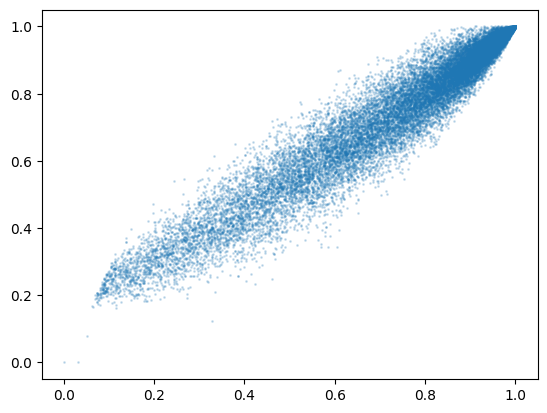

In [5]:
# make sure the 3 radius and 5 radius are simnilar
plt.scatter(floe_lib[floe_lib.loc_clf3<.5].loc_sic5,floe_lib[floe_lib.loc_clf3<.5].loc_sic3,alpha=0.2,s=1)

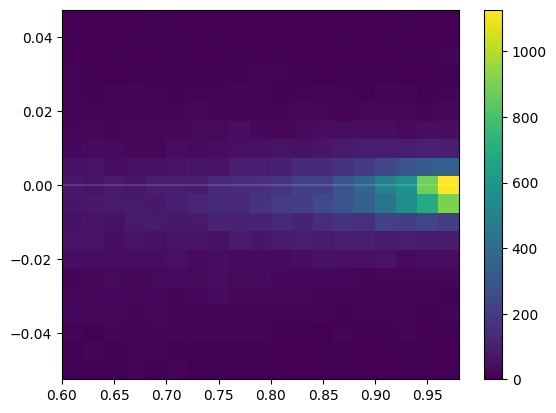

In [27]:
mask = ~np.isnan(floe_lib.loc_sic5) & ~np.isnan(floe_lib.ICE_ZETA_NORM)
plt.hist2d( floe_lib[mask].loc_sic5,floe_lib[mask].ICE_ZETA_NORM,bins=[np.arange(0.6,1,0.02),np.arange(-.0525,.05,.005)]);
plt.axhline(0,c='white',linewidth=0.2)
plt.colorbar()